# Logistic Regression Example
See: [sklearn documentation on LogisicRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression)

Coefficients are  [[-4.99233917  0.00509773]]
Checking the y-intercept  [-4.99233917]
Score is  0.9727
Probabilties for each of the classes, No and Yes in order
[[0.99251209 0.00748791]]
[[0.4474996 0.5525004]]
[[0.00492494 0.99507506]]


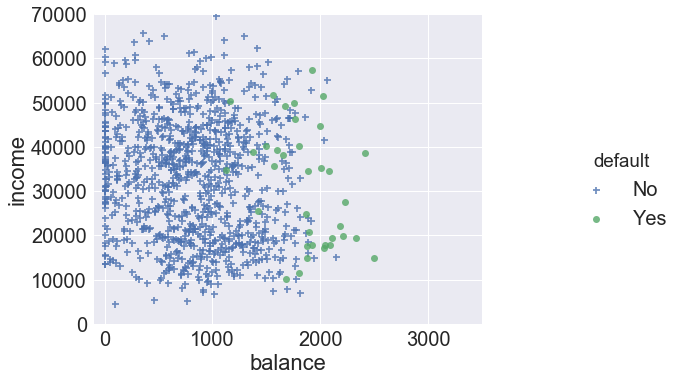

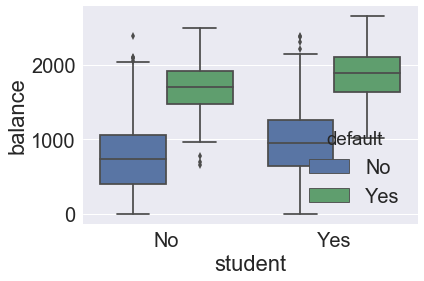

In [1]:
%matplotlib inline
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Load our dataset, and take a look at the head.

Coefficients are  [[-4.99233917  0.00509773]]
Checking the y-intercept  [-4.99233917]
Score is  0.9727
Probabilties for each of the classes, No and Yes in order
[[0.99251209 0.00748791]]
[[0.4474996 0.5525004]]
[[0.00492494 0.99507506]]


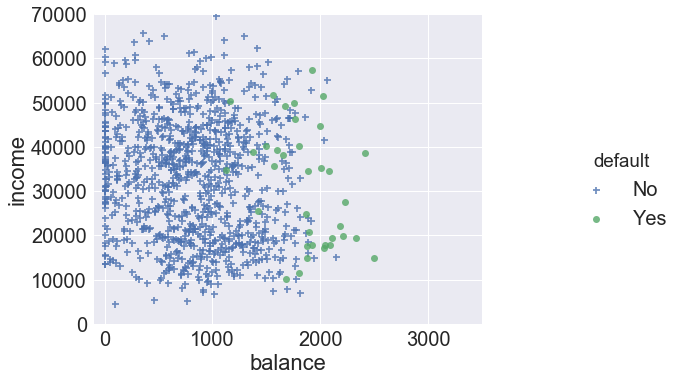

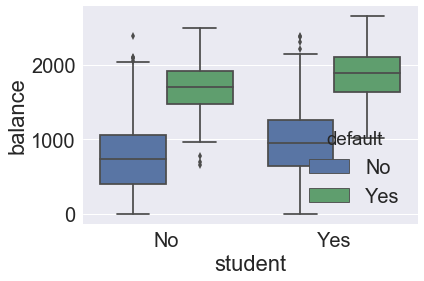

In [2]:
default = pd.read_csv("default1.csv")
default.head()

Coefficients are  [[-4.99233917  0.00509773]]
Checking the y-intercept  [-4.99233917]
Score is  0.9727
Probabilties for each of the classes, No and Yes in order
[[0.99251209 0.00748791]]
[[0.4474996 0.5525004]]
[[0.00492494 0.99507506]]


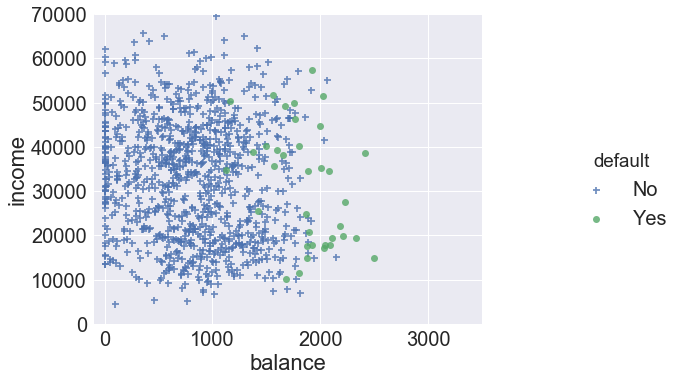

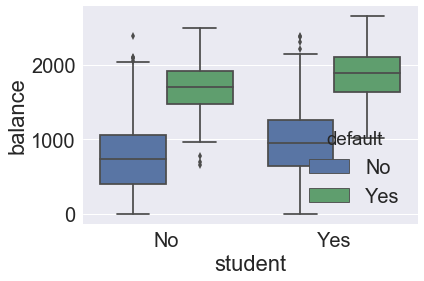

In [3]:

#default['default'] = default['default'].replace(['Yes'],1)
#default['default'] = default['default'].replace(['No'],0)
plt.interactive(True)
sns.set(font_scale=2)
g1 = sns.lmplot('balance', 'income', data=default.sample(1000), hue='default', markers = ['+', 'o'], fit_reg=False)
g1.fig.set_size_inches(12,6)
plt.ylim([0,70000])
plt.xlim([-100,3500])
plt.figure()
sns.boxplot(x='student', y='balance', data=default, hue='default')

lr = LogisticRegression()
# Required input variables to LinearRegression
# X : {array-like, sparse matrix}, shape (n_samples, n_features)
# y : array-like, shape (n_samples,)
X = np.column_stack((np.ones(len(default)), default['balance']))
y = default['default']
lr.fit(X, y)
print("Coefficients are ", lr.coef_)
# Note intercept is beta0 given above
print("Checking the y-intercept ", lr.intercept_)
# Note the score is not retunred by the LinearRegression object. It has to be computed from the input.
print("Score is ", lr.score(X, y))

# Predicting default probabilities:
"""
Parameters:	
X : array-like, shape = [n_samples, n_features]
Returns:	
T : array-like, shape = [n_samples, n_classes]
Returns the probability of the sample for each class in the model, ordered.
"""
# predict 1000 dollar balance default
print("Probabilties for each of the classes, No and Yes in order")
print(lr.predict_proba([[1, 1000]])) # 99 percent chance no default
# predict 2000 dollar balance default
print(lr.predict_proba([[1, 2000]])) ## 55 percent chance default
# predict 3000 dollar balance default
print(lr.predict_proba([[1, 3000]])) ## >99 percent chance default






plt.show(block=True)
